In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn import linear_model

In [2]:
np.random.seed(1)
X = 1.5 * np.random.randn(100) + 10.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 1000 residual terms
y = 20 + 0.3 * X  + res 

In [3]:
df = pd.DataFrame({'StudyTime': X,'Score': y})

In [4]:
df

,StudyTime,Score
0,12.936518,23.657391
1,9.582365,23.486963
2,9.707742,23.114069
3,8.890547,22.963953
4,11.798111,22.991978
...,...,...
95,10.616010,22.371084
96,9.984219,23.296425
97,10.565395,23.379760
98,9.569999,23.276475


In [5]:
max(X)


13.778363109799741

In [6]:
min(X)

7.047691954679576

In [7]:
max(y)

25.228858797424788

In [8]:
min(y)

21.57339618758479

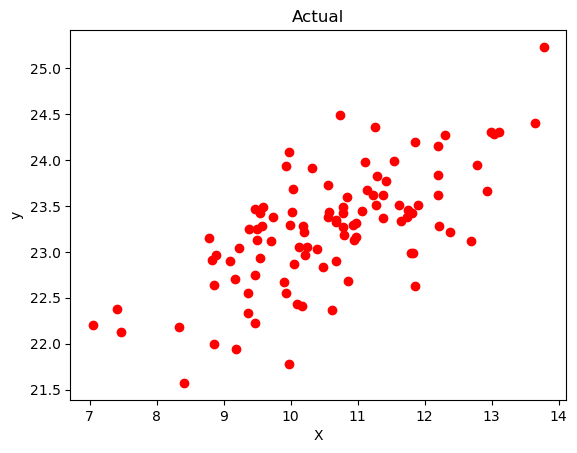

In [9]:
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [10]:
def loss_function(m, b, points):
    total_error =0
    for i in range(len(points)):
        x=points.iloc[i].StudyTime
        yy=points.iloc[i].Score
        total_error += (yy-(m*x+b))**2
    return total_error/ float(len(points))    
    
    

In [11]:
def gradient_descent(m_now,b_now,points,L):
    m_gradient =0
    b_gradient =0
    n=len(points)
    
    for i in range(n):
        x=points.iloc[i].StudyTime
        yy= points.iloc[i].Score
        
        m_gradient += -(2/n)*x*(yy-(m_now*x+b_now))
        b_gradient += -(2/n)* (yy-(m_now*x+b_now))
        
    m = m_now - m_gradient *L
    b = b_now - b_gradient *L
    return m,b
    

In [12]:
m =0
b =0

L=0.008 #try 0.008 and 0.009
epochs =12000

In [13]:
for i in range(epochs):
    if i% 500 == 0:
        print(f"Epoch: {i}")
        print(m,b)
    m,b = gradient_descent(m,b,df,L)
    
#print(m,b)

Epoch: 0
0 0
Epoch: 500
1.9386296012345516 2.4567453262303167
Epoch: 1000
1.7530291324924214 4.4530413935198805
Epoch: 1500
1.5888669841987078 6.218749493599458
Epoch: 2000
1.4436668609713807 7.780504358407497
Epoch: 2500
1.3152384991086326 9.16186419791984
Epoch: 3000
1.201644627670066 10.383666062742023
Epoch: 3500
1.1011717458140187 11.464340159514643
Epoch: 4000
1.0123042755832958 12.420187860406221
Epoch: 4500
0.9337017002483585 13.26562760031324
Epoch: 5000
0.8641783433524787 14.013412370990972
Epoch: 5500
0.8026854834369374 14.674822092893887
Epoch: 6000
0.7482955346567723 15.259833766548555
Epoch: 6500
0.7001880546603583 15.777271970099024
Epoch: 7000
0.6576373686694715 16.23494197319637
Epoch: 7500
0.6200016230758505 16.639747475182702
Epoch: 8000
0.5867131034338653 16.997794743584357
Epoch: 8500
0.5572696708014897 17.314484723786837
Epoch: 9000
0.5312271872515825 17.594594509314184
Epoch: 9500
0.5081928162964267 17.842349401647756
Epoch: 10000
0.48781909716619215 18.061486646

In [14]:
# m=.7
# b=15.88
ypred = m*X + b

In [15]:
z=loss_function(m, b, df)
z

0.2316904460660946

In [16]:
df.iloc[0].StudyTime


12.936518045494863

In [17]:
z= df.iloc[0].StudyTime *m + b
z

24.240180639121363

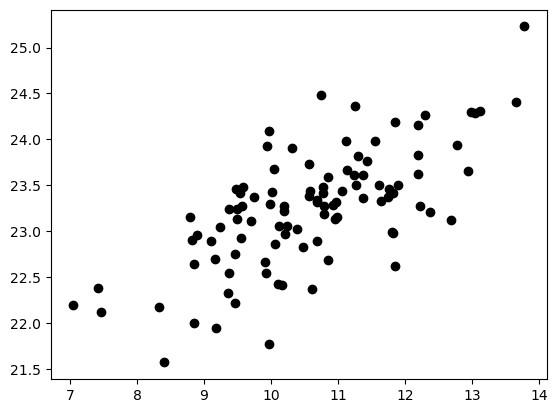

In [18]:
plt.scatter(df.StudyTime,df.Score,color="black")
#plt.plot(list(range(6,14)),[m*x+b for x in range(6,14)], color="red")
plt.show()

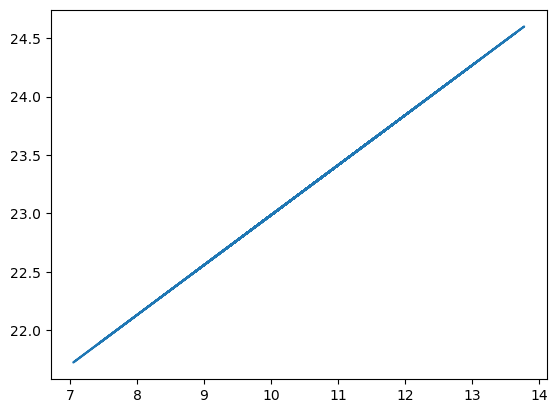

In [19]:
plt.plot(X, ypred)     # regression line
plt.show()

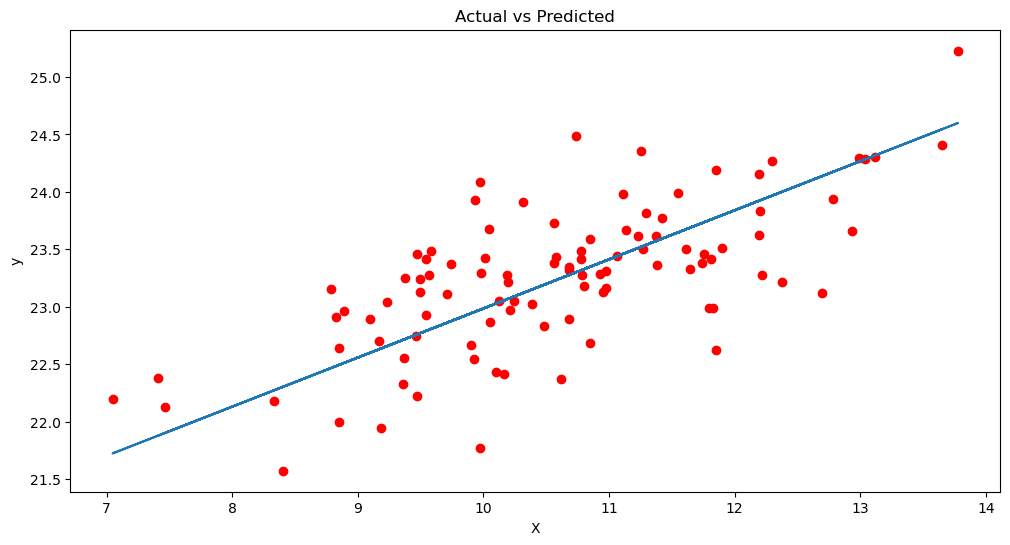

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.plot(X, ypred)     # regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [21]:
def predict(value):
    #value = X
    for i in range(value):
        # straight line = m*x+y
       print(i, ':',df.iloc[i].StudyTime,':',df.iloc[i].Score,':', m * df.iloc[i].StudyTime + b,':',ypred[i])

In [22]:
predict(12)

0 : 12.936518045494863 : 23.65739113125546 : 24.240180639121363 : 24.240180639121363
1 : 9.582365379524887 : 23.486963466260214 : 22.80697614836591 : 22.80697614836591
2 : 9.707742371604816 : 23.114068532376844 : 22.860548804706045 : 22.860548804706045
3 : 8.890547066765745 : 22.96395338164826 : 22.511367328083864 : 22.511367328083864
4 : 11.798111443987018 : 22.991977510325583 : 23.753747964145052 : 23.753747964145052
5 : 7.047691954679576 : 22.198998802933204 : 21.723929043222807 : 21.723929043222807
6 : 13.11721764632472 : 24.305443519445554 : 24.31739223476952 : 24.31739223476952
7 : 9.358189648657346 : 22.330606593693233 : 22.711187525666222 : 22.711187525666222
8 : 10.978558644085648 : 23.160458340223883 : 23.40355914741444 : 23.40355914741444
9 : 10.125944436783884 : 23.054090604381845 : 23.039243437165332 : 23.039243437165332
10 : 12.693161905567461 : 23.12138991154686 : 24.13619637026698 : 24.13619637026698
11 : 7.409788935753519 : 22.380516376747202 : 21.878650390473734 : 21.